# **Required Libraries**

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Loading Dataset**

In [5]:



path = 'train.csv'


df = pd.read_csv(path, sep=';', names=['text','emotion'])
df.head(2)


,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness


# **Missing Values**

In [6]:
df.isna().sum()

text       0
emotion    0
dtype: int64

# **Shape**

In [7]:
print('Rows : ', df.shape[0])
print('Columns : ', df.shape[1])

Rows :  16000
Columns :  2


# **Ifno**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


# **Bar Plot : Distribution of Emotions in Tweets**

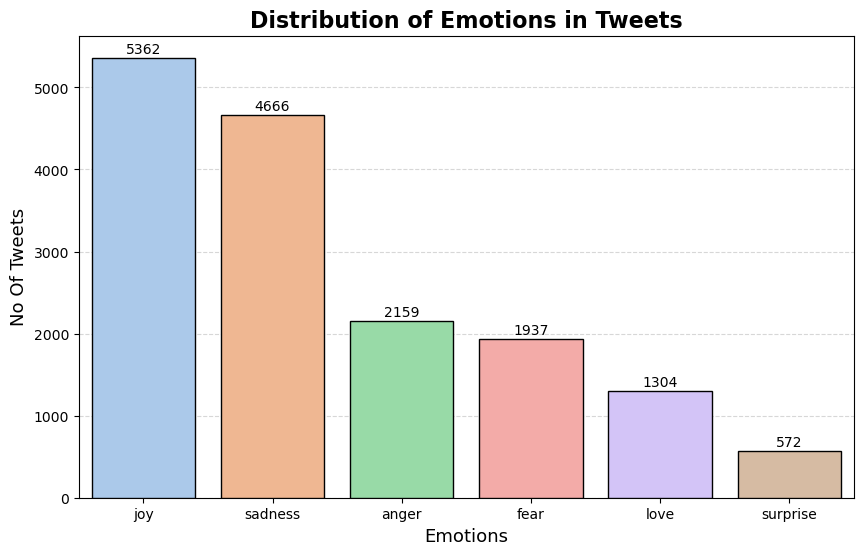

In [11]:
group=df.value_counts('emotion').reset_index(name='count')


plt.figure(figsize=(10,6))
sns.barplot(data=group, x='emotion', y='count' ,hue='emotion',palette='pastel', zorder=3, edgecolor='black')

plt.grid(True, alpha=0.5, linestyle='--', axis='y')

plt.title('Distribution of Emotions in Tweets', fontsize=16, fontweight='bold')
plt.xlabel('Emotions', fontsize=13)
plt.ylabel('No Of Tweets', fontsize=13)

for i,v in enumerate(group['count']):
    plt.text(i,v+50, str(v),ha='center', fontweight=12)

plt.savefig('Distribution of Emotions in Tweets.png', dpi=300)
plt.show()

# **Ecoding Target Features**

In [12]:
le=LabelEncoder()
df['target']=le.fit_transform(df['emotion'])

# **Features**

In [14]:
X= df['text']
y= df['target']

# **Spliting Data**

In [15]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# **Pipeline**

In [16]:
pipe= Pipeline([
    ('vect', TfidfVectorizer()),
    ('model', SVC(class_weight='balanced', probability=True, C=1.0))
])

# **Model Training**

In [19]:
pipe.fit(X_train, y_train)

,steps,"[('vect', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


# **Model Prediction**

In [20]:
y_pred = pipe.predict(X_test)

# **Accuracy** 

In [21]:
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.850625


# **Classification Report**

In [22]:
print('Classification Report :')

print(classification_report(y_test, y_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.88      0.83      0.85       427
           1       0.83      0.78      0.80       397
           2       0.82      0.92      0.87      1021
           3       0.78      0.74      0.76       296
           4       0.91      0.88      0.89       946
           5       0.80      0.53      0.64       113

    accuracy                           0.85      3200
   macro avg       0.84      0.78      0.80      3200
weighted avg       0.85      0.85      0.85      3200



# **Confusion Matrix**

AttributeError: module 'matplotlib.pyplot' has no attribute 'save_fig'

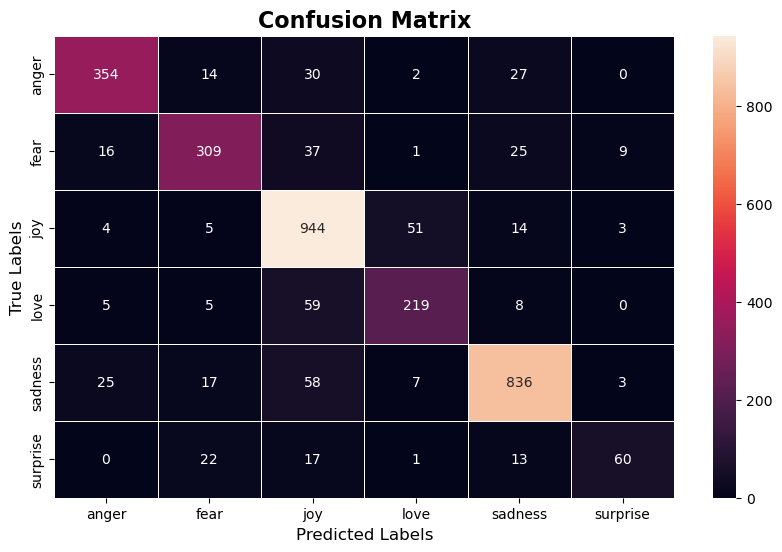

In [23]:
cm=confusion_matrix(y_test, y_pred)
class_name= le.classes_
class_name

plt.figure(figsize=(10,6))
sns.heatmap(cm ,xticklabels=class_name, yticklabels=class_name,  annot=True, fmt='d', linewidth=0.5)

plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)
plt.savefig('Confusion Matrix.png')

plt.show()